# Exploratory Data Analysis on stock data from 5 companies.

IBM

GE

Procter & Gamble

Coca Cola

Boeing

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [8]:
ibm = pd.read_csv('D:/DS/analytics_edge/IBMStock.csv')
ge = pd.read_csv('D:/DS/analytics_edge/GEStock.csv')
png = pd.read_csv('D:/DS/analytics_edge/ProcterGambleStock.csv')
cc = pd.read_csv('D:/DS/analytics_edge/CocaColaStock.csv')
boeing = pd.read_csv('D:/DS/analytics_edge/BoeingStock.csv')

In [9]:
ibm.head()

,Date,StockPrice
0,1/1/70,360.319048
1,2/1/70,346.723684
2,3/1/70,327.345714
3,4/1/70,319.852727
4,5/1/70,270.375238


In [13]:
ibm['Date'] = pd.to_datetime(ibm['Date'])
ge['Date'] = pd.to_datetime(ge['Date'])
png['Date'] = pd.to_datetime(png['Date'])
cc['Date'] = pd.to_datetime(cc['Date'])
boeing['Date'] = pd.to_datetime(boeing['Date'])

In [14]:
ibm.shape

(480, 2)

Total number of observations in each of the 5 datasets is 480 with 2 columns each.

In [16]:
ibm['Date'].describe()

count                     480
unique                    480
top       2009-09-01 00:00:00
freq                        1
first     1970-01-01 00:00:00
last      2009-12-01 00:00:00
Name: Date, dtype: object

first     1970-01-01 00:00:00

So, the earliest date is January 1, 1970 for any dataset

last      2009-12-01 00:00:00

and, latest date is December 1, 2009 for any dataset.

In [17]:
ibm['StockPrice'].mean()

144.3750303076664

In [24]:
ge['StockPrice'].min()

9.293636364

In [25]:
cc['StockPrice'].max()

146.58428569999998

In [26]:
boeing['StockPrice'].median()

44.88339827

In [27]:
png['StockPrice'].std()

18.19414030797156

### Visualizing stock dynamics

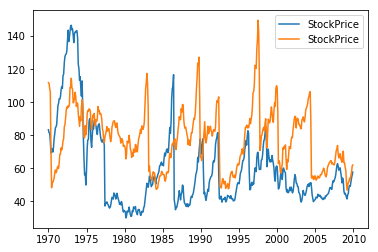

In [33]:
plt.plot(cc['Date'], cc['StockPrice'])
plt.plot(png['Date'], png['StockPrice'])
plt.legend()

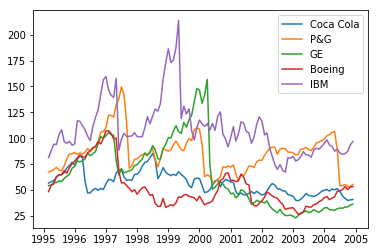

In [72]:
a = cc.iloc[(cc.index > 301) & (cc.index < 420)]
b = png.iloc[(png.index > 301) & (png.index < 420)]
c = ge.iloc[(ge.index > 301) & (ge.index < 420)]
d = boeing.iloc[(boeing.index > 301) & (boeing.index < 420)]
e = ibm.iloc[(ibm.index > 301) & (ibm.index < 420)]
plt.plot(a['Date'], a['StockPrice'])
plt.plot(b['Date'], b['StockPrice'])
plt.plot(c['Date'], c['StockPrice'])
plt.plot(d['Date'], d['StockPrice'])
plt.plot(e['Date'], e['StockPrice'])
labels = ['Coca Cola', 'P&G', 'GE', 'Boeing', 'IBM']
plt.legend(labels)

### Monthly Trends

In [73]:
ibm.head()

,Date,StockPrice
0,1970-01-01,360.319048
1,1970-02-01,346.723684
2,1970-03-01,327.345714
3,1970-04-01,319.852727
4,1970-05-01,270.375238


In [81]:
ibm['Month'] = pd.DatetimeIndex(ibm['Date']).month

In [82]:
ibm.head()

,Date,StockPrice,Month
0,1970-01-01,360.319048,1
1,1970-02-01,346.723684,2
2,1970-03-01,327.345714,3
3,1970-04-01,319.852727,4
4,1970-05-01,270.375238,5


In [132]:
a = ibm.groupby(pd.Grouper('Month')).mean()
a

,StockPrice
Month,
1,150.238423
2,152.693993
3,152.432690
4,152.116824
5,151.502194
6,139.090676
7,139.067018
8,140.145475
9,139.088527


In [128]:
ibm['StockPrice'].mean()

144.3750303076664

IBM had a higher stock price than total average during the first 5 months of the year.

Creating a function to compute the average of each month across the entire dataset.

In [135]:
def monthly_trends(df):
    df['Month'] = pd.DatetimeIndex(df['Date']).month
    a = df.groupby(pd.Grouper('Month')).mean()
    return a

In [136]:
monthly_trends(ibm)

,StockPrice
Month,
1,150.238423
2,152.693993
3,152.432690
4,152.116824
5,151.502194
6,139.090676
7,139.067018
8,140.145475
9,139.088527


In [138]:
monthly_trends(cc)

,StockPrice
Month,
1,60.368487
2,60.734754
3,62.071354
4,62.688882
5,61.443581
6,60.812084
7,58.983460
8,58.880139
9,57.600238


In [139]:
monthly_trends(png)

,StockPrice
Month,
1,79.617984
2,79.025755
3,77.347607
4,77.686708
5,77.859578
6,77.392751
7,76.645559
8,76.822663
9,76.623845


In [140]:
monthly_trends(boeing)

,StockPrice
Month,
1,46.510974
2,46.892233
3,46.882076
4,47.046860
5,48.137160
6,47.385255
7,46.553602
8,46.863107
9,46.304854


In [141]:
monthly_trends(ge)

,StockPrice
Month,
1,62.045106
2,62.520805
3,63.150548
4,64.480092
5,60.871351
6,56.468439
7,56.733493
8,56.503149
9,56.239131
